# Credit Card Late Payment Problem Analysis

<p> Due to Covid-19 situation today. Late payment on loan product such as credit card, personal loan, load house and etc. I am working with bank in my courntry also has this problem. They are facing about this problem also because the customer more than 20% take over due or not paid. Even through they announce the policy for extend payment time this issue still on going. I need to find a use case for predic this. </p> 

<p> This notebook I will be apply predict model and also using machine learning from the course applies and findout how to analysis to protect the late payment on credit card so I think that if this use case will help us. By the way I will be metholody on this course into our notebook. </p>

<p> Date Source : "https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients" </p>

### Abstraction Step
My use case should be following with course guidlines: 

  <li> Getting the Data </li>
  <li> Data Preparation (missing,standardize, normalize and categorize) </li>
  <li> Descriptive analytics </li>
  <li> Feature Engineering </li>
  <li> Dimensionality Reduction </li>
  <li> Modeling </li>
  <li> Explainabilit </li>

### Algorithms/Model </li>
  
  <i>I will use Algorithms/Models base on the course such as: <i>
   
  <li> Logistic regression (scikit learn) </li>
  <li> Random Forests (scikit learn) </li>
  <li> Boosted Trees (xgboost) </li>
  <li>Deep Learning (keras/tensorflow) </li>

#### Imports library

In [91]:
!pip install wget

In [92]:
!pip install pyclustering

In [93]:
!pip install scikit-tda

In [94]:
!pip install kmapper

In [95]:
import wget
import urllib
import re
import os
import shutil
import pytz as tz
from datetime import datetime
import numpy as np
np.random.seed(1337)
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from patsy import dmatrices
import importlib
import kmapper as km
from math import log
%matplotlib inline

<p> Prepare parameter for ploting </p>

In [96]:
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams.update({'font.size': 10})
plt.rcParams['xtick.major.pad']='5'
plt.rcParams['ytick.major.pad']='5'
plt.style.use('ggplot')

#### Data preparation
We cache the data set from the above mentioned repository in a local directory. 

In [97]:
datadir = './data'
if not os.path.exists(datadir):
    os.makedirs(datadir)

In [98]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default of credit card clients.xls' 
filename = os.path.join(datadir, 'default of credit card clients.xls')

if not os.path.isfile(filename):
    wget.download(url, out=filename)

In [99]:
df = pd.read_excel(filename, header=1)

In [100]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [101]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

#### Data Wrangling
<p> We use pandas to read the data from its original excel format into a dataframe </p>
<div>So, how do we identify all those missing values and deal with them?</div> 

<b>How to work with missing data?</b>

Steps for working with missing data:

<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>

In [102]:
df.replace("", np.nan, inplace = True)
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [103]:
missing_data = df.isnull()
missing_data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [104]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ID
False    30000
Name: ID, dtype: int64

LIMIT_BAL
False    30000
Name: LIMIT_BAL, dtype: int64

SEX
False    30000
Name: SEX, dtype: int64

EDUCATION
False    30000
Name: EDUCATION, dtype: int64

MARRIAGE
False    30000
Name: MARRIAGE, dtype: int64

AGE
False    30000
Name: AGE, dtype: int64

PAY_0
False    30000
Name: PAY_0, dtype: int64

PAY_2
False    30000
Name: PAY_2, dtype: int64

PAY_3
False    30000
Name: PAY_3, dtype: int64

PAY_4
False    30000
Name: PAY_4, dtype: int64

PAY_5
False    30000
Name: PAY_5, dtype: int64

PAY_6
False    30000
Name: PAY_6, dtype: int64

BILL_AMT1
False    30000
Name: BILL_AMT1, dtype: int64

BILL_AMT2
False    30000
Name: BILL_AMT2, dtype: int64

BILL_AMT3
False    30000
Name: BILL_AMT3, dtype: int64

BILL_AMT4
False    30000
Name: BILL_AMT4, dtype: int64

BILL_AMT5
False    30000
Name: BILL_AMT5, dtype: int64

BILL_AMT6
False    30000
Name: BILL_AMT6, dtype: int64

PAY_AMT1
False    30000
Name: PAY_AMT1, dtype: int64

PAY_AMT2
False    30000
Na

<i> Change all columns name that mixed uppercase to lowercase <i> 

In [105]:
df.columns = [x.lower() for x in df.columns]
df = df.rename(index=str, columns={"pay_0": "pay_1"})
df = df.drop('id', axis=1)
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object')

<p> Verify correct data type for each column </p>

In [106]:
df.dtypes

limit_bal                     int64
sex                           int64
education                     int64
marriage                      int64
age                           int64
pay_1                         int64
pay_2                         int64
pay_3                         int64
pay_4                         int64
pay_5                         int64
pay_6                         int64
bill_amt1                     int64
bill_amt2                     int64
bill_amt3                     int64
bill_amt4                     int64
bill_amt5                     int64
bill_amt6                     int64
pay_amt1                      int64
pay_amt2                      int64
pay_amt3                      int64
pay_amt4                      int64
pay_amt5                      int64
pay_amt6                      int64
default payment next month    int64
dtype: object

<i> that we need to find the potentail late payment then we need to set target variable </i>

In [107]:
print("Explanatory variables:  {}".format(len(df.columns)-1))
print("Number of Observations: {}".format(df.shape[0]))
df['target'] = df['default payment next month'].astype('category')
print("Target variable:       '{}' -> '{}'".format('default payment next month', 'target'))


Explanatory variables:  23
Number of Observations: 30000
Target variable:       'default payment next month' -> 'target'


In [108]:
df.head(5)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month,target
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0


#### Descriptive Analytics 

<p> We have 23 variables to consider what is the variables to indicate late payment <p>

<table>
  <tr>
    <td> No. </td>
    <td>Variable Name    </td>
    <td>Description</t>
  </tr>
  <tr>
    <td>1.</td>
    <td>limit_bal</td>
    <td>Amount of the given credit (NT dollar):</td>
  </tr>
  <tr>
    <td>2.</td>
    <td>sex</td>
    <td> Gender (1 = male; 2 = female)</td>
  </tr>
  <tr>
    <td>3.</td>
    <td>education</td>
    <td>Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)</td>
  </tr>
  <tr>
    <td>4.</td>
    <td>marriage</td>
    <td>Marital status (1 = married; 2 = single; 3 = others)</td>
  </tr>
  <tr>
    <td>5.</td>
    <td>age</td>
    <td>Age (year)</td>
  </tr>
  <tr>
    <td>6-11</td>
    <td>pay_1 - pay_6</td>
    <td>History of past payment. From April-September, 2005 : on time paid=1,2.. ,late paid = -1,-2 (at  month)
    </td>
  </tr>
  <tr>
    <td>12-17</td>
    <td>bill_amt1-bill_amt6</td>
    <td>Amount of bill statement . From April-September, 2005 : 
    </td>
  </tr>
  <tr>
    <td>18-23</td>
    <td>pay_amt1-pay_amt6</td>
    <td>Amount of previous payment</td>
  </tr>
  </table>

##### Pattern Late Payment Delays
Let's start by looking at the past payment delays

In [109]:
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]

df[pay_status_columns].head(10)

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,-1,-1,0,0,-1
8,0,0,2,0,0,0
9,-2,-2,-2,-2,-1,-1


<i>Distribution of late payment pattern</i>

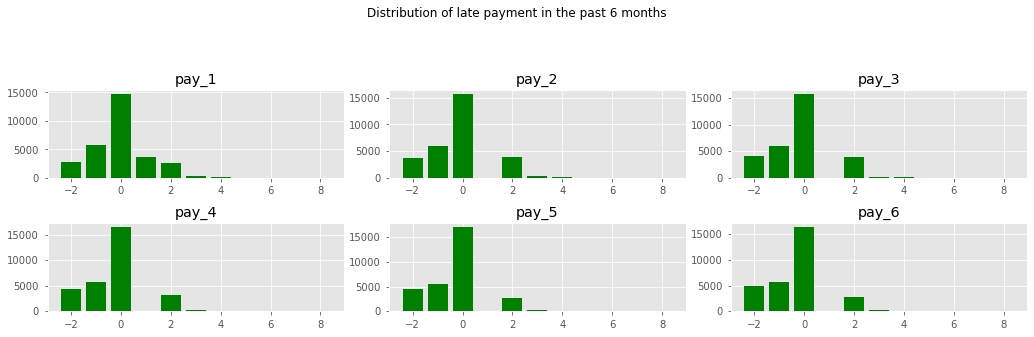

In [110]:
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution of late payment in the past 6 months')

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='g')
    ax[row,col].set_title(pay_status_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

<p>As above chart are showing that it does not so much customer on time paid with continous. That has some people paid continue with 2 months not more than that (normal a month). The late payment occurecs in every month but we could not that the cause of the prblem</p>

##### Payment statistic
<p> For the statistic at below it said that most people still on time but not consistant

In [111]:
pattern = re.compile("^bill_amt[0-9]+$")
bill_columns = [ x for x in df.columns if (pattern.match(x))]
df[bill_columns].describe()

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [112]:
df[bill_columns].head(10)

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
5,64400,57069,57608,19394,19619,20024
6,367965,412023,445007,542653,483003,473944
7,11876,380,601,221,-159,567
8,11285,14096,12108,12211,11793,3719
9,0,0,0,0,13007,13912


<p> function for use multi column </p>

In [113]:
def selcols(prefix, a=1, b=6):
    return [prefix+str(i) for i in np.arange(a,b+1)]

##### Payments in the previous months
Let's have a quick look at how the payments are performed in the previous month.

In [114]:
pattern = re.compile("^pay_amt[0-9]+$")
pay_amount_columns = [ x for x in df.columns if (pattern.match(x))]
df[pay_amount_columns].describe()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [115]:
df[pay_amount_columns].head(10)

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
5,2500,1815,657,1000,1000,800
6,55000,40000,38000,20239,13750,13770
7,380,601,0,581,1687,1542
8,3329,0,432,1000,1000,1000
9,0,0,0,13007,1122,0


<p> Let's the distribution of payment amount </p>

In [116]:
df['pay_amt_sum'] = df[selcols('pay_')].sum(axis=1)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


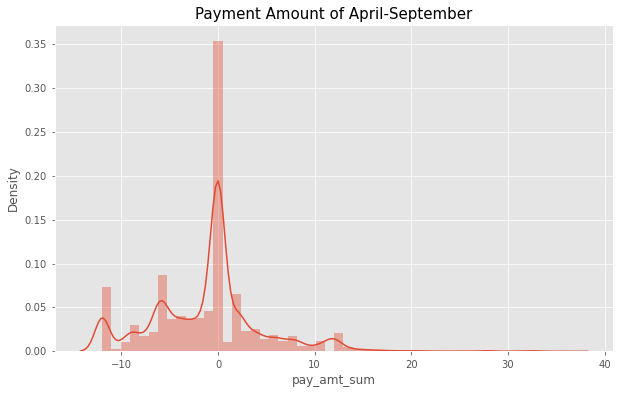

In [117]:
plt.figure(figsize = (10, 6))
sns.distplot(df['pay_amt_sum'])
plt.title('Payment Amount of April-September',fontsize = 15)
plt.show()

### Bill amount of previous month

In [118]:
pattern = re.compile("^bill_amt[0-9]+$")
bill_amount_columns = [ x for x in df.columns if (pattern.match(x))]
df[bill_amount_columns].describe()

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [119]:
df[bill_amount_columns].head(10)

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
5,64400,57069,57608,19394,19619,20024
6,367965,412023,445007,542653,483003,473944
7,11876,380,601,221,-159,567
8,11285,14096,12108,12211,11793,3719
9,0,0,0,0,13007,13912


<p> Let's the distribution of bill amount </p>

In [120]:
df['bill_amt_sum'] = df[selcols('bill_amt')].sum(axis=1)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


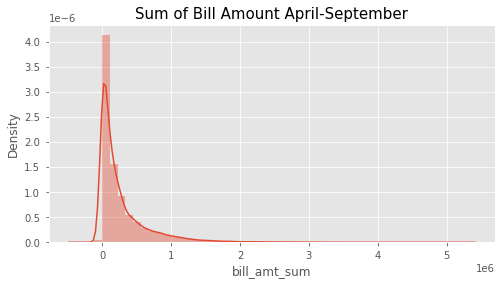

In [121]:
plt.figure(figsize = (8, 4))
sns.distplot(df['bill_amt_sum'])
plt.title('Sum of Bill Amount April-September',fontsize = 15)
plt.show()

In [122]:
df['limit_bal'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: limit_bal, dtype: float64

<p> Let's take a look credit limit </p>

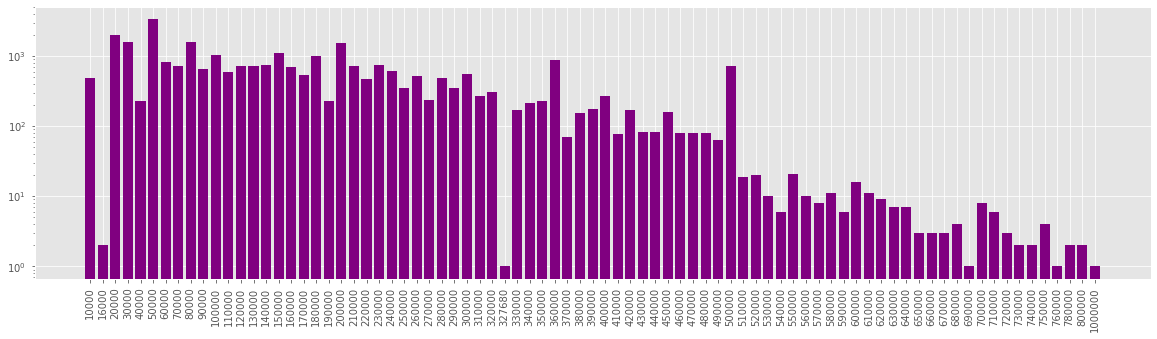

In [123]:
fig = plt.figure()
fig.set_size_inches(20,5)
ax = fig.add_subplot(111)

d = df.groupby(['limit_bal']).size()
ax.set_yscale("log")
ax.set_xticks(np.arange(len(d)))
ax.set_xticklabels(['%d' % i for i in d.index], rotation='vertical')
p = ax.bar(np.arange(len(d)), d, color='purple')

#### Explore Defaulting

 <p> Just Come Back !!! , let's start with a zoomed out view on the problem.  </p>
 <p> We want to predict defaulting, Let's answer the following questions: </p>

  <li> how many cases do we have on our dataset to work with? </li>
  <li> What is the breakdown depending on some of the variables available? </li>

defaulting accounts are 22.12% out of 30000 observations


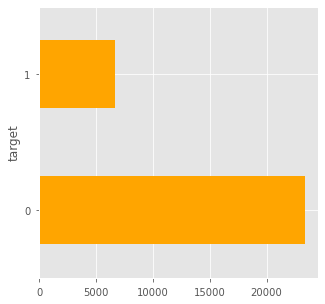

In [124]:
fig = plt.figure()
fig.set_size_inches(5,5)
d = df.groupby(['target']).size()

percentage = (100* d[1]/(d[1]+d[0]))
observ = d[1]+d[0]
print("defaulting accounts are {}% out of {} observations".format(percentage,observ))
p = d.plot(kind='barh', color='orange')


#### Explore some statistics of defaulting using the categorical variables

Let's have a look at a number of histograms to see how defaulting correlated with the categorical variables available, before that let's make use of categorical features of pandas, by converting target, sex, marriage, education, age and the pay_\* columns to categories

In [125]:
df['sex'] = df['sex'].astype('category').cat.rename_categories(['M', 'F'])
df['marriage'] = df['marriage'].astype('category').cat.rename_categories(['na', 'married', 'single', 'other'])

In [126]:
df['age_cat'] = pd.cut(df['age'], range(0, 100, 10), right=False)

In [127]:
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]
for i in pay_status_columns:
    df[i] = df[i].astype('category')

### Overall statistics

<p> To see target variable with each other </p>

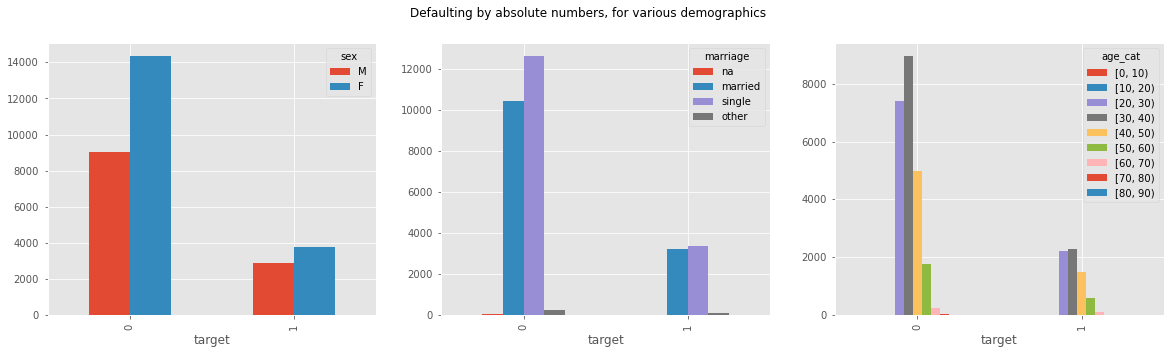

In [128]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Defaulting by absolute numbers, for various demographics')

d = df.groupby(['target', 'sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = df.groupby(['target', 'marriage']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = df.groupby(['target', 'age_cat']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

#### Statistics relative to the population

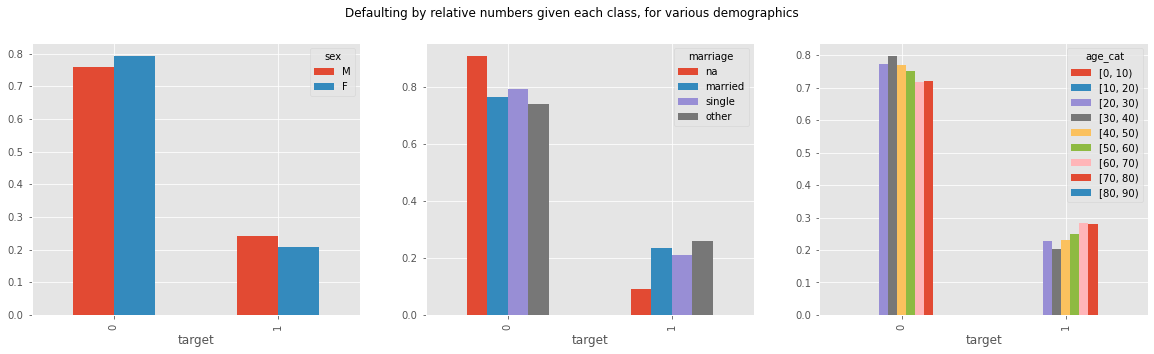

In [129]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Defaulting by relative numbers given each class, for various demographics')

d = df.groupby(['target', 'sex']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = df.groupby(['target', 'marriage']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = df.groupby(['target', 'age_cat']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

# Feature engineering

<p> It's not about blind feature conversion to values between 0 and 1, it's about understanding data on bill & payment are skewed data  . In this case they exibits a log/log distribution, So we are going to take log of them. </p>

<p>Our use case is facing with skewed data then for dealing with it. So log-transformation is widely used to deal with skewed data. Despite the common belief that the log transformation can decrease the variability of data and make data conform more closely to the normal distribution </p>

In [130]:
df['pay_avg'] = df[selcols('pay_')].mean(axis=1)
df['pay_std'] = df[selcols('pay_')].std(axis=1)

In [131]:
df[selcols('pay_')].mean(axis=1)

0       -0.333333
1        0.500000
2        0.000000
3        0.000000
4       -0.333333
           ...   
29995    0.000000
29996   -0.666667
29997    1.333333
29998   -0.166667
29999    0.000000
Length: 30000, dtype: float64

##  Log-Transformation

In [132]:
# average payment
df['pay_amt_avg']     = df[selcols('pay_amt')].mean(axis=1)

# log of average
df['pay_amt_avg_log'] = df['pay_amt_avg'].apply(lambda x: log(x+1))

#amounts relative to the average payment
for i in np.arange(1,7):
    df['pay_relamt'+str(i)] = df['pay_amt'+str(i)]/df['pay_amt_avg']

# log of payments
for i in np.arange(1,7):
    df['pay_amt_log'+str(i)] = df['pay_amt'+str(i)].apply(lambda x: log(x+1))

In [133]:
# average bill
df['bill_amt_avg'] = df[selcols('bill_amt')].mean(axis=1)
df['bill_amt_avg_log'] = df['bill_amt_avg'].apply(lambda x: log(x+1) if x>0 else 0)

# bill sign as a separate feature
for i in np.arange(1,7):
    df['bill_amt_sign'+str(i)] = df['bill_amt'+str(i)].apply(lambda x: float(x>0))
    
# bill log as a separate feature (0 if bill is negative)
for i in np.arange(1,7):
    df['bill_amt_log'+str(i)] = df['bill_amt'+str(i)].apply(lambda x: log(x+1) if x>0 else 0)
    
#bill amounts relative to the limit
for i in np.arange(1,7):
    df['bill_relamt'+str(i)] = df['bill_amt'+str(i)]/df['limit_bal']


In [134]:
#log of credit limit
df['limit_bal_log'] = df['limit_bal'].apply(lambda x: log(x+1))
df['limit_bal_cat'] = pd.cut(df['limit_bal'], range(0, int(1e6), 10000), right=False)

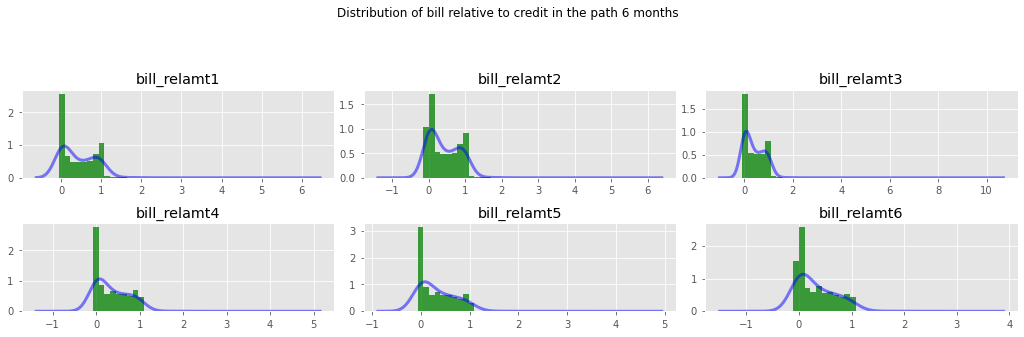

In [135]:
#from sklearn.neighbors.kde import KernelDensity
from sklearn.neighbors._kde import KernelDensity

pattern = re.compile("^bill_relamt[0-9]+$")
columns = [ x for x in df.columns if (pattern.match(x))]

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution of bill relative to credit in the path 6 months')

for i in range(len(columns)):
    row,col = int(i/3), i%3

    d = df[columns[i]]
    # the histogram of the data
    #n, bins, patches = ax[row,col].hist(d, 50, normed=1, facecolor='green', alpha=0.75)
    n, bins, patches = ax[row,col].hist(d, 50, density=True, stacked=True, facecolor='green', alpha=0.75)

    # kernel density estimation
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(d.values.reshape(-1, 1))
    x_grid = np.linspace(d.min(), d.max(), 1000)
    log_pdf = kde.score_samples(x_grid.reshape(-1, 1))

    # add the density line
    ax[row,col].plot(x_grid, np.exp(log_pdf), color='blue', alpha=0.5, lw=3)
    ax[row,col].set_title(columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

Intuition: if the credit is much larger than the bill, being behind might not be a problem. Therefore this contructed feature mightturn up useful when predicting defaulting

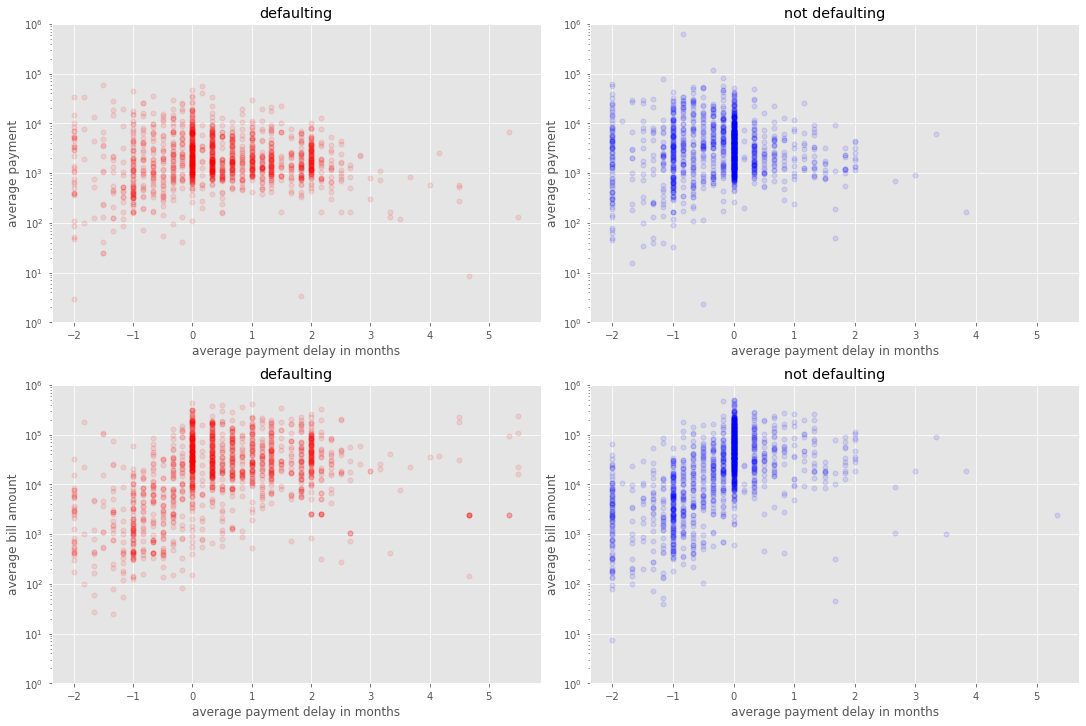

In [136]:
def_no = df[df['target']==0].sample(1500)
def_yes  = df[df['target']==1].sample(1500)

fig,ax = plt.subplots(2,2)
fig.set_size_inches(15,10)

ax[0,0].set_ylim([1,1e6])
ax[0,0].set_title('defaulting')
ax[0,0].set_ylabel('average payment')
ax[0,0].set_xlabel('average payment delay in months')
p = ax[0,0].semilogy(def_yes['pay_avg'], def_yes['pay_amt_avg'], 'ro', markersize=5, alpha=0.1)

ax[0,1].set_ylim([1,1e6])
ax[0,1].set_title('not defaulting')
ax[0,1].set_ylabel('average payment')
ax[0,1].set_xlabel('average payment delay in months')
p = ax[0,1].semilogy(def_no['pay_avg'], def_no['pay_amt_avg'], 'bo', markersize=5, alpha=0.1)

ax[1,0].set_ylim([1,1e6])
ax[1,0].set_title('defaulting')
ax[1,0].set_ylabel('average bill amount')
ax[1,0].set_xlabel('average payment delay in months')
p = ax[1,0].semilogy(def_yes['pay_avg'], def_yes['bill_amt_avg'], 'ro', markersize=5, alpha=0.1)

ax[1,1].set_ylim([1,1e6])
ax[1,1].set_title('not defaulting')
ax[1,1].set_ylabel('average bill amount')
ax[1,1].set_xlabel('average payment delay in months')
p = ax[1,1].semilogy(def_no['pay_avg'], def_no['bill_amt_avg'], 'bo', markersize=5, alpha=0.1)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

#### From variables to train, test matrices

In [137]:


formula  = 'target ~ '

# original features
formula += 'C(sex) + C(marriage) +  C(education) + age'
formula += '+' + '+'.join(selcols('pay_'))

#### engineered / normalized features

# categorical age and credit limit (binned)
formula += '+' + 'C(age_cat)'
formula += '+' + 'C(limit_bal_cat) + limit_bal_log'

#pay delays
formula += '+' + 'pay_avg + pay_std'
    
#pay_amt
formula += '+' + 'pay_amt_avg_log'
formula += '+' + '+'.join(selcols('pay_relamt'))
formula += '+' + '+'.join(selcols('pay_amt_log'))

# bill amounts
formula += '+' + 'bill_amt_avg_log'
formula += '+' + '+'.join(selcols('bill_relamt'))
formula += '+' + '+'.join(selcols('bill_amt_sign'))
formula += '+' + '+'.join(selcols('bill_amt_log'))

y, X = dmatrices(formula, data=df, return_type='dataframe')
y = y.iloc[:, 1]

#### Visualization: Confusion matrices and AUC curves

In [138]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])


#### Feature selection



In [139]:
import warnings
from sklearn.feature_selection import SelectKBest, f_classif

warnings.simplefilter(action='ignore', category=(UserWarning,RuntimeWarning))

#selector = SelectKBest(f_classif, 25)
#selector.fit(X, y)
selector = SelectKBest(f_classif)
selector.fit(X, y)

SelectKBest()

In [140]:
top_indices = np.nan_to_num(selector.scores_).argsort()[-25:][::-1]
selector.scores_[top_indices]
X.columns[top_indices]

Index(['pay_1[T.2]', 'pay_2[T.2]', 'pay_avg', 'pay_3[T.2]', 'pay_4[T.2]',
       'pay_5[T.2]', 'pay_std', 'pay_6[T.2]', 'pay_1[T.0]', 'limit_bal_log',
       'pay_amt_log1', 'pay_amt_avg_log', 'bill_relamt6', 'pay_2[T.0]',
       'bill_relamt5', 'bill_relamt4', 'pay_amt_log2', 'bill_relamt3',
       'bill_relamt2', 'pay_amt_log3', 'pay_1[T.3]', 'bill_relamt1',
       'pay_2[T.3]', 'pay_3[T.0]', 'pay_amt_log4'],
      dtype='object')

<b> The Cause of Late Payment: </b>
<p> Looks like some of the constructed features are indeed beneficial.
Also it seems that demographics are only marginally influencing the prediction.
paid amounts, delays, and bill relative to credit issued are top indicators. Interestingly education score quite high as a a predictive feature. </p>

#### Feature scaling



In [141]:
#from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [142]:
from sklearn.pipeline import Pipeline

preprocess = Pipeline([('anova', selector), ('scale', scaler)])
preprocess.fit(X,y)

X_prep = preprocess.transform(X)

#### Model selection and validation

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=42)

### Models
#### Logistic regression (baseline models)

In [144]:
from sklearn import linear_model

# Create logistic regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LogisticRegression()

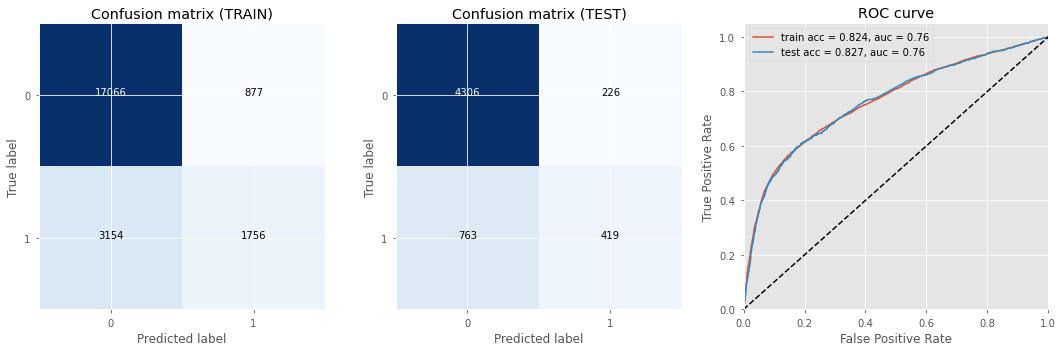

In [145]:
y_train_pred = regr.predict_proba(X_train)[:,1]
y_test_pred = regr.predict_proba(X_test)[:,1]

threshold = 0.5

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

#### Random Forest 
<p> Quite popular a few years back, bootstrap aggregating ensamble of decision trees </p>

In [146]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=5, n_estimators=500)

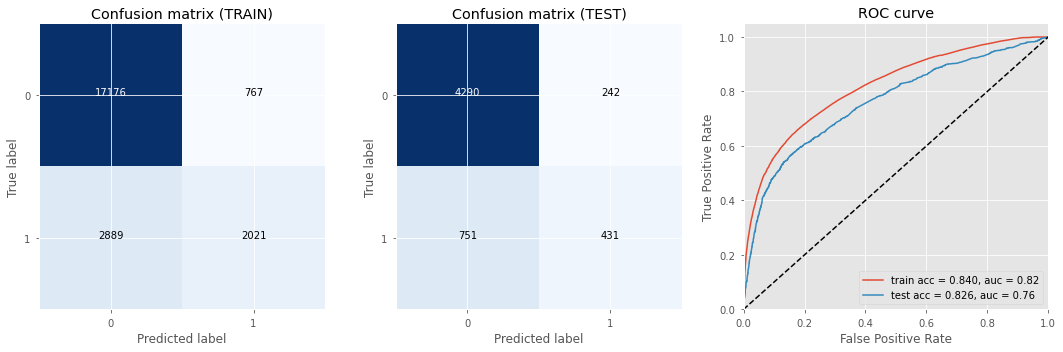

In [147]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score

threshold = 0.5
y_train_pred = rf.predict_proba(X_train)[:,1]
y_test_pred = rf.predict_proba(X_test)[:,1]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

#### Decision Trees boosting

<p>An iterative model for refining a model by looking at the remainder error. </p>

In [148]:
import xgboost as xgb

In [149]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [150]:
num_round = 5
evallist  = [(dtest,'eval'), (dtrain,'train')]
#param = {'objective':'binary:logistic', 'silent':1, 'eval_metric': ['error', 'logloss']}
param = {'objective':'binary:logistic', 'eval_metric': ['error', 'logloss']}
bst = xgb.train( param, dtrain, num_round, evallist )

[0]	eval-error:0.17343	eval-logloss:0.57271	train-error:0.17087	train-logloss:0.57147
[1]	eval-error:0.17361	eval-logloss:0.50906	train-error:0.16974	train-logloss:0.50673
[2]	eval-error:0.17291	eval-logloss:0.47249	train-error:0.16926	train-logloss:0.46985
[3]	eval-error:0.17221	eval-logloss:0.45131	train-error:0.16899	train-logloss:0.44795
[4]	eval-error:0.17133	eval-logloss:0.43884	train-error:0.16803	train-logloss:0.43476


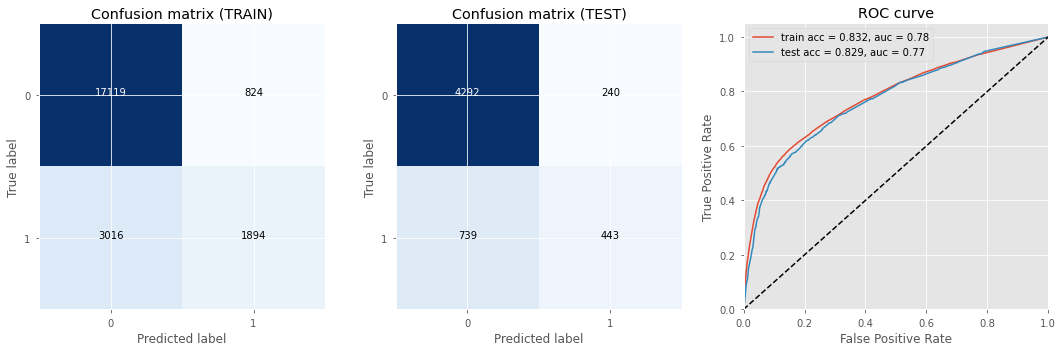

In [151]:
threshold = 0.5
y_train_pred = bst.predict(dtrain)
y_test_pred = bst.predict(dtest)

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

#### Feed forward deep neural nets

In [155]:
input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(256, input_shape=(input_dim,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1,  activation='sigmoid'))

In [156]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [157]:
history = model.fit(
              X_train,y_train,batch_size=23, epochs=5,verbose=1,
              validation_data=(X_test,y_test))

Epoch 1/5
994/994 [==============================] - 9s 8ms/step - loss: 0.4570 - accuracy: 0.8113 - val_loss: 0.4239 - val_accuracy: 0.8267
Epoch 2/5
994/994 [==============================] - 8s 8ms/step - loss: 0.4327 - accuracy: 0.8228 - val_loss: 0.4336 - val_accuracy: 0.8257
Epoch 3/5
994/994 [==============================] - 8s 8ms/step - loss: 0.4324 - accuracy: 0.8211 - val_loss: 0.4250 - val_accuracy: 0.8252
Epoch 4/5
994/994 [==============================] - 8s 8ms/step - loss: 0.4298 - accuracy: 0.8245 - val_loss: 0.4238 - val_accuracy: 0.8273
Epoch 5/5
994/994 [==============================] - 8s 8ms/step - loss: 0.4254 - accuracy: 0.8255 - val_loss: 0.4261 - val_accuracy: 0.8273


In [158]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
45/45 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.8273
test loss, test acc: [0.4261249005794525, 0.8272663354873657]


In [159]:
batch_accuracy = history.history['accuracy']

In [160]:
val_accuracy = history.history['val_accuracy']

In [161]:
val_loss = history.history['val_loss']

In [162]:
loss_batch=history.history['loss']

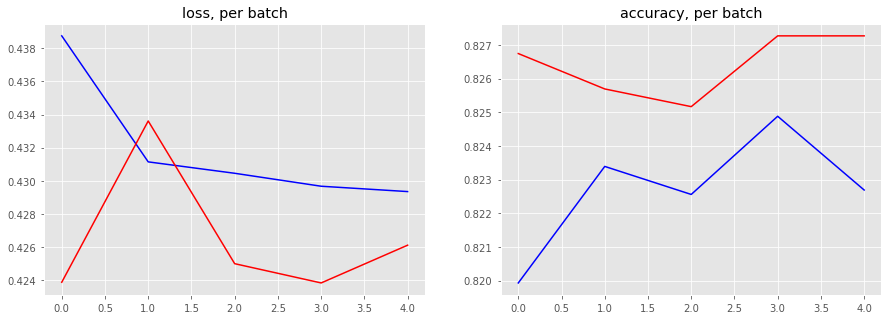

In [163]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(loss_batch, 'b-',label='train');
plt.plot(val_loss, 'r-',label='test');

plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(batch_accuracy, 'b-',label='train');
plt.plot(val_accuracy, 'r-',label='train');

plt.show()

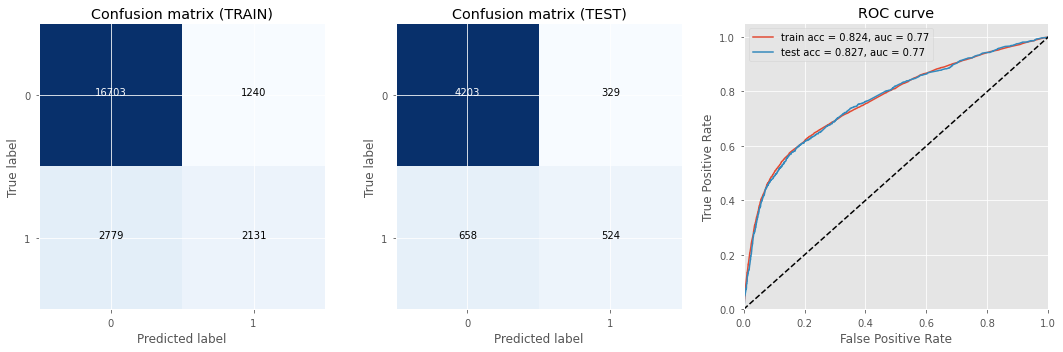

In [164]:
y_train_pred = model.predict_on_batch(np.array(X_train))[:,0]
y_test_pred = model.predict_on_batch(np.array(X_test))[:,0]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0], y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)')
plot_cm(ax[1], y_test, y_test_pred, [0,1], 'Confusion matrix (TEST)')

plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred)
    
plt.tight_layout()
plt.show()

#### Peeking in the "brain" of our neural network

<li>  we build a new model with the activations of the old model </li>
<li>   this model is truncated before the last layer </li>

In [188]:
model2 = Sequential()
model2.add(Dense(256, input_shape=(input_dim,), activation='relu', weights=model.layers[0].get_weights()))
model2.add(Dense(256, activation='relu', weights=model.layers[1].get_weights()))
model2.add(Dense(64, activation='relu', weights=model.layers[2].get_weights()))
model2.add(Dense(64, activation='relu', weights=model.layers[3].get_weights()))
model2.add(Dense(32, activation='sigmoid', weights=model.layers[4].get_weights()))


In [189]:
activations = model2.predict_on_batch(np.array(X_test))

#### "Picking the brain" (method 1):  TSNE analysis

In [190]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=25, verbose=0, n_iter=500, random_state=1337)
samples = tsne.fit_transform(activations)

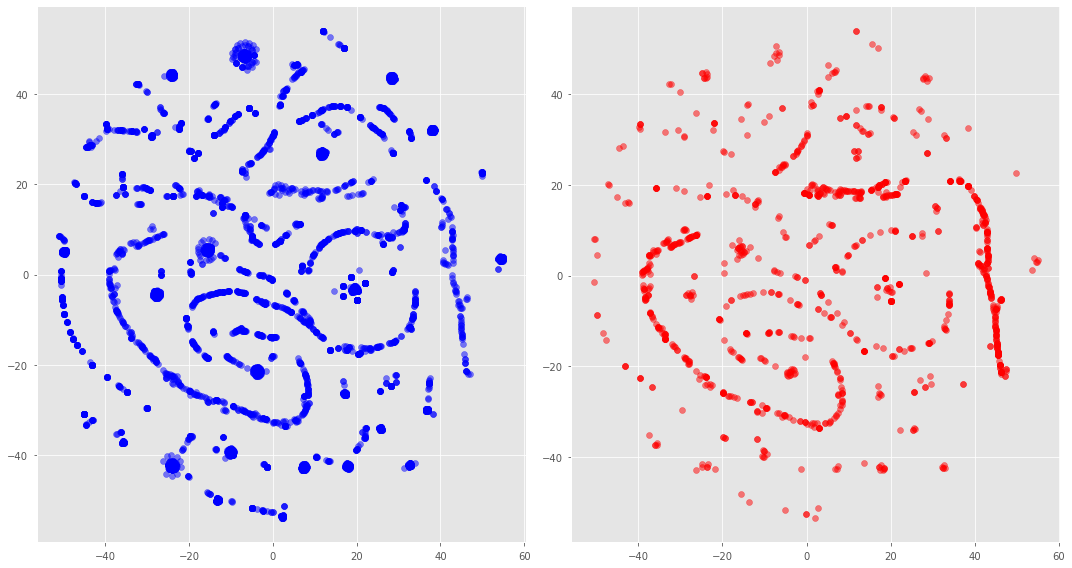

In [191]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,8)

ax[0].scatter(*samples[y_test==0].T,color='b', alpha=0.5, label='default: NO')
ax[1].scatter(*samples[y_test==1].T,color='r', alpha=0.5, label='default: YES')

plt.tight_layout()
plt.show()

<p> cluster and show the lift curve for that particular segment
    percent of defaulting in that specific cluster
    histogram of the the top characterizing functions with that <p>

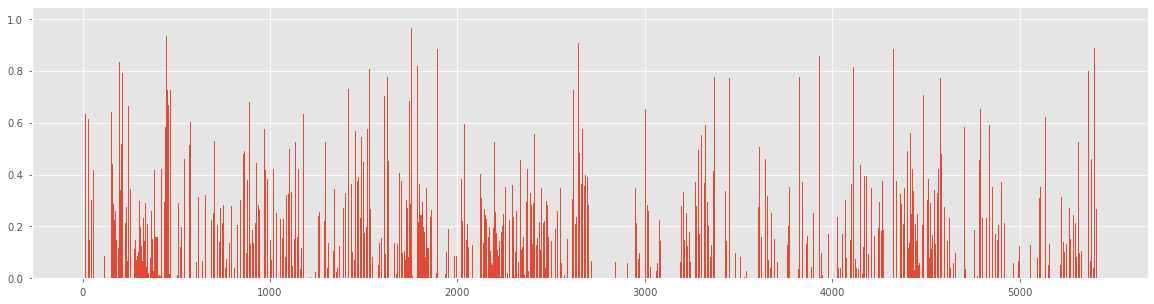

In [192]:
from pyclustering.cluster.optics import optics

# Create OPTICS algorithm for cluster analysis
optics_instance = optics(samples, 1, 3, 100);

# Run cluster analysis
optics_instance.process();
 
# Obtain results of clustering
clusters = optics_instance.get_clusters();
noise = optics_instance.get_noise();

# Obtain rechability-distances
ordering = optics_instance.get_ordering();

# Visualization of cluster ordering in line with reachability distance.
indexes = [i for i in range(0, len(ordering))];

fig = plt.figure()
fig.set_size_inches(20,5)
plt.bar(indexes, ordering);
plt.show(); 

In [193]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

pred  = (y_test_pred>0.5).astype(int)
truth = (y_test>0.5).values.astype(int)

avg = y_test.mean()

cluster_defaulting_data = [ 
    [ 
        len(cl) , 
        truth[cl].mean(), 
        pred[cl].mean(),
        max(np.bincount(truth[cl])/len(truth[cl])),
        max(np.bincount(pred[cl])/len(pred[cl])),
        truth[cl].mean()/avg,
        pred[cl].mean()/avg,
        accuracy_score(truth[cl], pred[cl]),
        f1_score(truth[cl], pred[cl]),
        precision_score(truth[cl], pred[cl]),
        recall_score(truth[cl], pred[cl])
    ] for cl in clusters ]

columns=[
    'count', 
    'rate_truth', 
    'rate_pred', 
    'purity_truth', 
    'purity_pred', 
    'lift_truth', 
    'lift_pred', 
    'accuracy', 
    'f1', 
    'precision', 
    'recall']

cl_df = pd.DataFrame(cluster_defaulting_data, columns=columns)

In [194]:
cl_df.shape

(277, 11)

<i> Find the best score for Accurary or 0.82 | F1 > 0.7  </i>

In [195]:
sel = ((cl_df['f1']>0.7) | (cl_df['accuracy']>0.82))
clusters_topsel = cl_df[sel]
clusters_topsel.head(15)


,count,rate_truth,rate_pred,purity_truth,purity_pred,lift_truth,lift_pred,accuracy,f1,precision,recall
0,20,0.100000,0.0,0.900000,1.0,0.483418,0.000000,0.900000,0.000000,0.000000,0.0
2,27,0.074074,0.0,0.925926,1.0,0.358087,0.000000,0.925926,0.000000,0.000000,0.0
3,10,0.100000,0.0,0.900000,1.0,0.483418,0.000000,0.900000,0.000000,0.000000,0.0
6,25,0.080000,0.0,0.920000,1.0,0.386734,0.000000,0.920000,0.000000,0.000000,0.0
8,23,0.173913,0.0,0.826087,1.0,0.840727,0.000000,0.826087,0.000000,0.000000,0.0
10,77,0.090909,0.0,0.909091,1.0,0.439471,0.000000,0.909091,0.000000,0.000000,0.0
11,25,0.120000,0.0,0.880000,1.0,0.580102,0.000000,0.880000,0.000000,0.000000,0.0
12,7,0.142857,0.0,0.857143,1.0,0.690597,0.000000,0.857143,0.000000,0.000000,0.0
13,21,0.142857,0.0,0.857143,1.0,0.690597,0.000000,0.857143,0.000000,0.000000,0.0
14,7,0.000000,0.0,1.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0


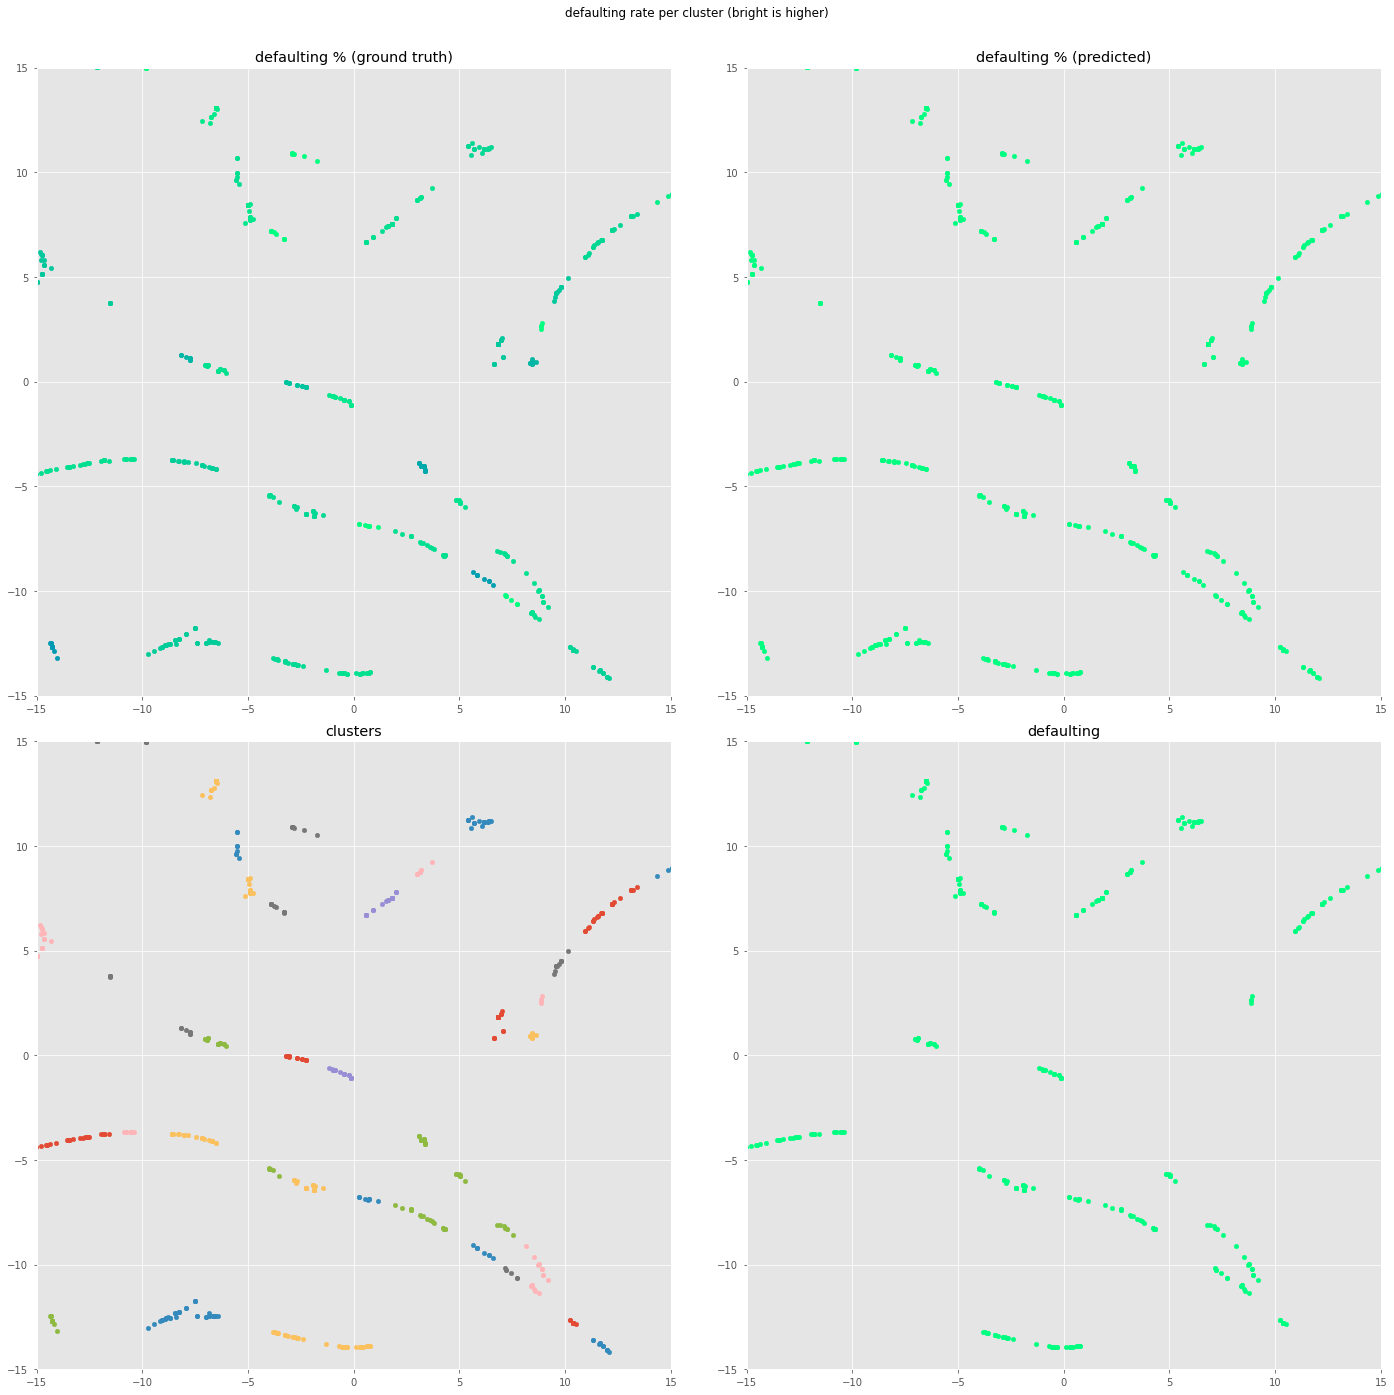

In [196]:
# prepare figure
fig,ax = plt.subplots(2,2)
fig.set_size_inches(20,20)

cmap = plt.cm.winter_r
color_true = cl_df['rate_truth'].apply(cmap)
color_pred = cl_df['rate_pred'].apply(cmap)

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].set_xlim([-15, 15])
        ax[i,j].set_ylim([-15, 15])

for i in range(len(clusters)):
    d = samples[clusters[i],:]
    
    ax[0,0].scatter(d[:,0], d[:,1], s=20, color=color_true[i])
    ax[0,1].scatter(d[:,0], d[:,1], s=20, color=color_pred[i])

    ax[1,0].scatter(d[:,0], d[:,1], s=20)
    if i in clusters_topsel.index:
        ax[1,1].scatter(d[:,0], d[:,1], s=20, color=color_pred[i])

fig.suptitle("defaulting rate per cluster (bright is higher)")

ax[0,0].set_title("defaulting % (ground truth)")
ax[0,1].set_title("defaulting % (predicted)")

ax[1,0].set_title('clusters')
ax[1,1].set_title('defaulting')

plt.tight_layout(pad=3, w_pad=4, h_pad=1.0)
plt.show()

#### Peeking on the brain :  TDA analysis on TSNE lens

In [197]:
import importlib

In [198]:
# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(samples, projection=[0,1]) #list(range(activations.shape[1])))

projected_data.shape

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (5714, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()



(5714, 2)

In [199]:
cover = km.Cover(n_cubes=20)
graph = mapper.map(projected_data, cover=cover)

Mapping on data shaped (5714, 2) using lens shaped (5714, 2)

Creating 400 hypercubes.

Created 978 edges and 332 nodes in 0:00:00.687426.


In [200]:
mapper.visualize(graph, path_html="credit_Card_group.html",
                 title="Credit Card Group)")

Wrote visualization to: credit_Card_group.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Credit Card Group) | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-